<a href="https://colab.research.google.com/github/shubh70abhir/project1/blob/main/training_code_for_melanoma_skin_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

2023-04-14 11:08:29.481057: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-14 11:08:29.481096: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
file_path = 'archive (2)/data/train'

In [ ]:
name_class = os.listdir(file_path)
name_class

['benign', 'malignant']

In [ ]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [ ]:
filepaths

['archive (2)/data/train/benign/1298.jpg',
 'archive (2)/data/train/benign/149.jpg',
 'archive (2)/data/train/benign/87.jpg',
 'archive (2)/data/train/benign/628.jpg',
 'archive (2)/data/train/benign/1184.jpg',
 'archive (2)/data/train/benign/1778.jpg',
 'archive (2)/data/train/benign/511.jpg',
 'archive (2)/data/train/benign/1069.jpg',
 'archive (2)/data/train/benign/193.jpg',
 'archive (2)/data/train/benign/1160.jpg',
 'archive (2)/data/train/benign/1114.jpg',
 'archive (2)/data/train/benign/338.jpg',
 'archive (2)/data/train/benign/1681.jpg',
 'archive (2)/data/train/benign/70.jpg',
 'archive (2)/data/train/benign/881.jpg',
 'archive (2)/data/train/benign/326.jpg',
 'archive (2)/data/train/benign/1045.jpg',
 'archive (2)/data/train/benign/1404.jpg',
 'archive (2)/data/train/benign/803.jpg',
 'archive (2)/data/train/benign/955.jpg',
 'archive (2)/data/train/benign/184.jpg',
 'archive (2)/data/train/benign/581.jpg',
 'archive (2)/data/train/benign/452.jpg',
 'archive (2)/data/train/be

In [ ]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',

In [ ]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,archive (2)/data/train/benign/1356.jpg,benign
1,archive (2)/data/train/malignant/181.jpg,malignant
2,archive (2)/data/train/benign/1597.jpg,benign
3,archive (2)/data/train/malignant/720.jpg,malignant
4,archive (2)/data/train/benign/1002.jpg,benign


In [ ]:
#balancing

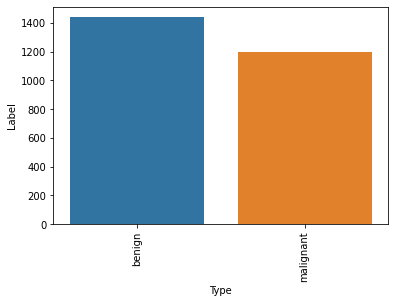

In [ ]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [ ]:
#balance by deleting extra images (Augmentor API)
#augmentation
#GAN

In [ ]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

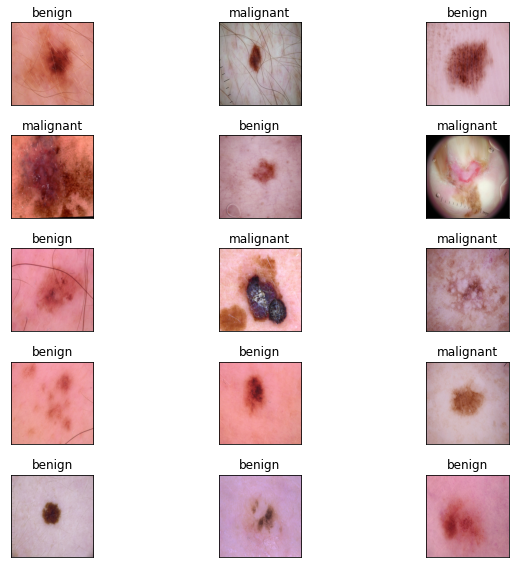

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1977 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.


In [ ]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

2023-04-14 11:09:02.747794: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-14 11:09:02.747861: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-14 11:09:02.747911: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (admin1-HP-EliteBook-840-G1): /proc/driver/nvidia/version does not exist
2023-04-14 11:09:02.748446: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=100
)

2023-04-14 11:09:24.435041: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-14 11:09:24.451549: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2494135000 Hz


Epoch 1/100


2023-04-14 11:09:27.912398: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 20480000 exceeds 10% of free system memory.
2023-04-14 11:09:28.600725: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 20480000 exceeds 10% of free system memory.
2023-04-14 11:09:28.618807: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 22151168 exceeds 10% of free system memory.
2023-04-14 11:09:28.674759: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 20480000 exceeds 10% of free system memory.
2023-04-14 11:09:28.690871: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 20480000 exceeds 10% of free system memory.


62/62 [==============================] - 87s 1s/step - loss: 0.4324 - accuracy: 0.8037 - val_loss: 0.3641 - val_accuracy: 0.8318
Epoch 2/100
62/62 [==============================] - 79s 1s/step - loss: 0.2886 - accuracy: 0.8665 - val_loss: 0.3686 - val_accuracy: 0.8379
Epoch 3/100
62/62 [==============================] - 105s 2s/step - loss: 0.2344 - accuracy: 0.8953 - val_loss: 0.3791 - val_accuracy: 0.8333
Epoch 4/100
62/62 [==============================] - 87s 1s/step - loss: 0.2044 - accuracy: 0.9084 - val_loss: 0.3548 - val_accuracy: 0.8470
Epoch 5/100
62/62 [==============================] - 84s 1s/step - loss: 0.1694 - accuracy: 0.9267 - val_loss: 0.4024 - val_accuracy: 0.8561
Epoch 6/100
62/62 [==============================] - 86s 1s/step - loss: 0.1305 - accuracy: 0.9403 - val_loss: 0.4586 - val_accuracy: 0.8364
Epoch 7/100
62/62 [==============================] - 84s 1s/step - loss: 0.1197 - accuracy: 0.9514 - val_loss: 0.4551 - val_accuracy: 0.8470
Epoch 8/100
62/62 [=====

Epoch 58/100
62/62 [==============================] - 94s 2s/step - loss: 2.4099e-05 - accuracy: 1.0000 - val_loss: 1.1526 - val_accuracy: 0.8500
Epoch 59/100
62/62 [==============================] - 95s 2s/step - loss: 2.2690e-05 - accuracy: 1.0000 - val_loss: 1.1572 - val_accuracy: 0.8561
Epoch 60/100
62/62 [==============================] - 94s 2s/step - loss: 2.1387e-05 - accuracy: 1.0000 - val_loss: 1.1648 - val_accuracy: 0.8515
Epoch 61/100
62/62 [==============================] - 93s 1s/step - loss: 1.9899e-05 - accuracy: 1.0000 - val_loss: 1.1689 - val_accuracy: 0.8545
Epoch 62/100
62/62 [==============================] - 95s 2s/step - loss: 1.9133e-05 - accuracy: 1.0000 - val_loss: 1.1807 - val_accuracy: 0.8500
Epoch 63/100
62/62 [==============================] - 95s 2s/step - loss: 1.8030e-05 - accuracy: 1.0000 - val_loss: 1.1832 - val_accuracy: 0.8545
Epoch 64/100
62/62 [==============================] - 94s 2s/step - loss: 1.6882e-05 - accuracy: 1.0000 - val_loss: 1.1928 -

In [ ]:
model.save("model_resnet50.h5")

/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


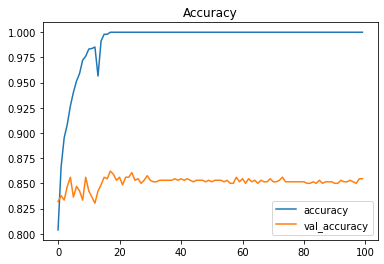

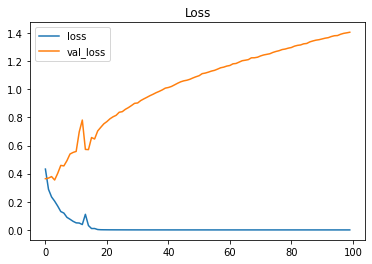

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 1.40524
Test Accuracy: 85.45%


In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      benign       0.88      0.86      0.87       365
   malignant       0.83      0.85      0.84       295

    accuracy                           0.85       660
   macro avg       0.85      0.85      0.85       660
weighted avg       0.86      0.85      0.85       660



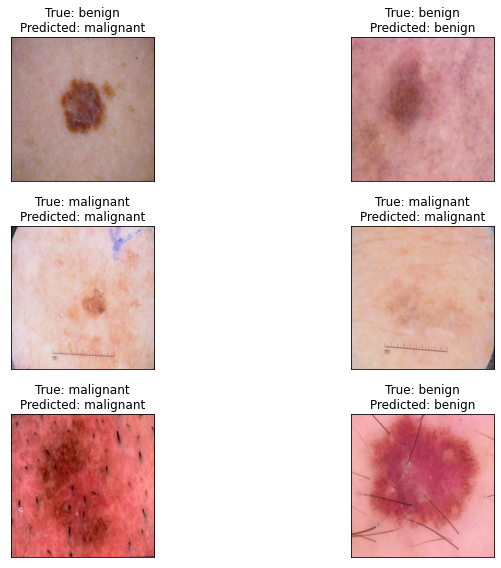

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'images/real/1.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


error: OpenCV(4.3.0) /io/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
from tensorflow.keras.models import load_model
loaded_model_imageNet = load_model("model_resnet50.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = '16.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = loaded_model_imageNet.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


[[  0 100]]


In [ ]:
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[0, 100]


In [ ]:
print("Largest element is:", max(pp))

Largest element is: 100


In [ ]:
index = pp.index(max(pp))

In [ ]:
name_class=['benign', 'Melignant']

In [ ]:
name_class[index]

'Melignant'

In [ ]:
plt.imread(img_path)

array([[[177, 156, 129],
        [180, 159, 130],
        [185, 161, 133],
        ...,
        [163, 130, 113],
        [155, 119, 103],
        [148, 111,  95]],

       [[181, 160, 131],
        [184, 163, 134],
        [187, 166, 137],
        ...,
        [168, 132, 116],
        [162, 125, 109],
        [156, 119, 103]],

       [[185, 164, 135],
        [188, 167, 138],
        [192, 171, 140],
        ...,
        [172, 136, 120],
        [168, 131, 115],
        [164, 127, 111]],

       ...,

       [[177, 135, 119],
        [182, 139, 122],
        [183, 138, 119],
        ...,
        [179, 139, 129],
        [175, 135, 125],
        [173, 135, 124]],

       [[177, 135, 121],
        [177, 136, 118],
        [176, 134, 112],
        ...,
        [173, 133, 123],
        [167, 129, 118],
        [165, 127, 116]],

       [[169, 130, 115],
        [175, 134, 116],
        [175, 133, 111],
        ...,
        [170, 132, 121],
        [165, 127, 116],
        [161, 123, 112]]

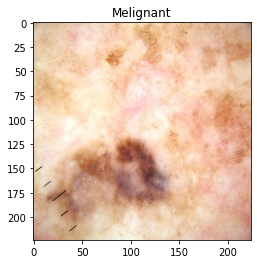

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.title(name_class[index])
plt.show()